# Example analysis
We'll be looking at a CSV dataset of people who tip at restaurants. The source data can be found in `data/tips.csv`.

The original dataset can be found at https://github.com/mwaskom/seaborn-data.

Tipping behavior at a popular US restaurant chain in a mall in 1990.

## Import pandas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

## Import the dataset

In [2]:
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,female,No,Sun,Dinner,4


## Describe the data

In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
np.round(df['tip'].mean() / df['total_bill'].mean() * 100, 2)

np.float64(15.15)

## Clean some data

In [8]:
df.sex.value_counts()

sex
Male      150
Female     84
male        3
M           3
female      2
m           1
F           1
Name: count, dtype: int64

In [9]:
df.sex = df.sex.str.title()
df.loc[df.sex.str.startswith("F"), "sex"] = "Female"
df.loc[df.sex.str.startswith("M"), "sex"] = "Male"

### Clean the smoker column

In [10]:
df.smoker.value_counts()

smoker
No     138
Yes     90
no       7
N        5
Y        2
yes      1
n        1
Name: count, dtype: int64

In [11]:
df.smoker = df.smoker.str.title()
df.loc[df.smoker.str.startswith("Y"), "smoker"] = "Yes"
df.loc[df.smoker.str.startswith("N"), "smoker"] = "No"

In [12]:
df.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [13]:
df.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

## Add new columns

In [14]:
df['percent'] = df.tip / df.total_bill * 100
df['percent'] = df.percent.round(2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [15]:
df['bill_per_person'] = df.total_bill / df['size']
df['bill_per_person'] = df.bill_per_person.round(2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,percent,bill_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,6.15


## Plot some data

<Axes: xlabel='total_bill', ylabel='tip'>

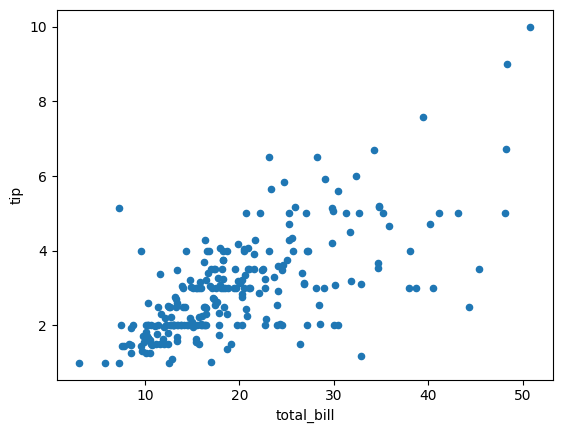

In [16]:
df.plot.scatter(x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

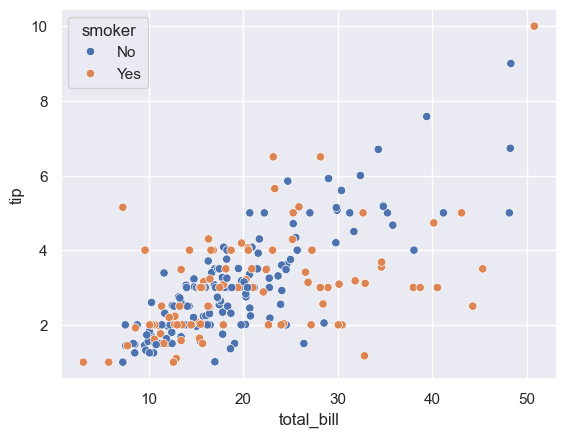

In [17]:
sb.set_theme()
sb.scatterplot(x='total_bill', y='tip', hue='smoker', data=df)

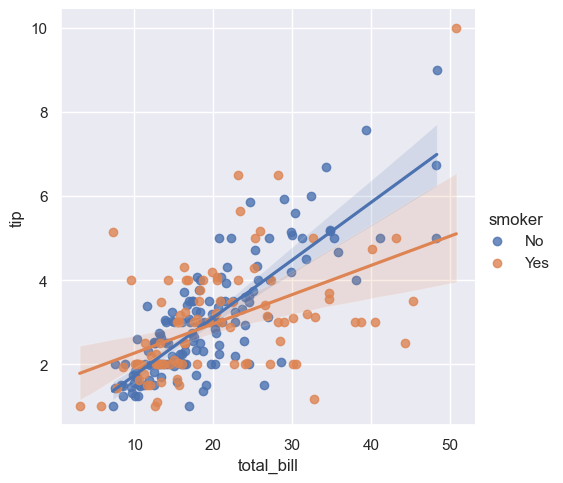

In [18]:
sb.set_theme()
sb.lmplot(x='total_bill', y='tip', hue='smoker', data=df)

<Axes: xlabel='day', ylabel='count'>

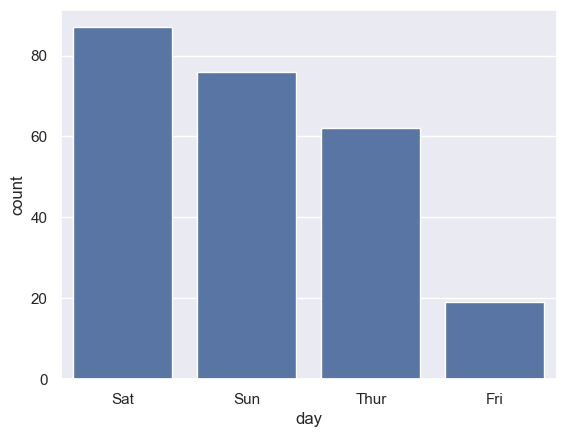

In [19]:
sb.barplot(data=df.day.value_counts())

<Axes: xlabel='day', ylabel='percent'>

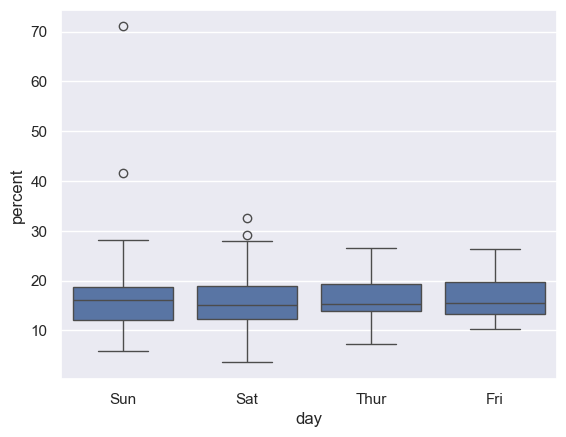

In [20]:
sb.boxplot(x='day', y='percent', data=df)

<Axes: xlabel='day', ylabel='percent'>

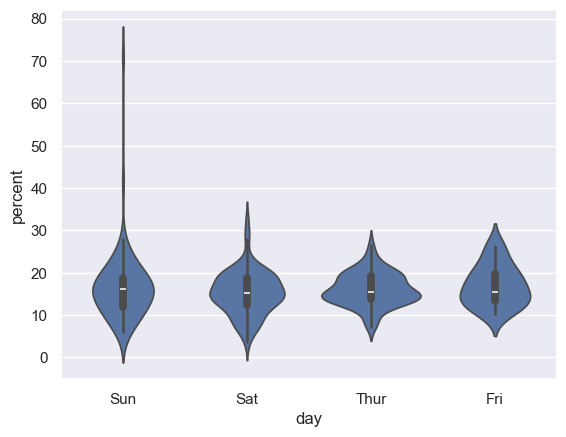

In [21]:
sb.violinplot(x='day', y='percent', data=df)

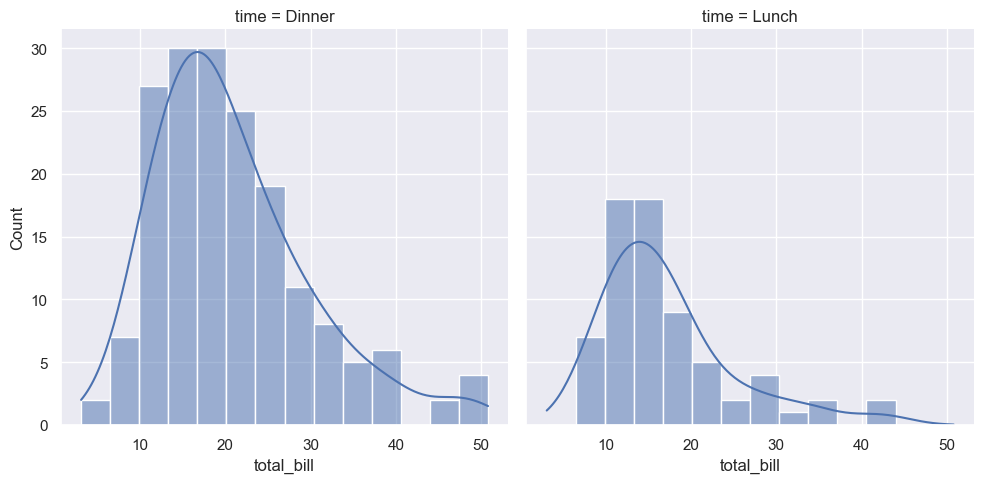

In [22]:
sb.displot(x='total_bill', col='time', data=df, kde=True)

<Axes: xlabel='tip', ylabel='percent'>

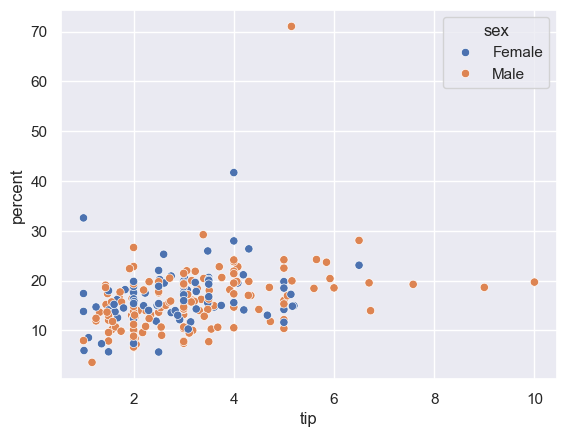

In [23]:
sb.scatterplot(x='tip', y='percent', hue='sex', data=df)

## Get some statistsics

In [24]:
df.describe()

,total_bill,tip,size,percent,bill_per_person
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.079754,7.888197
std,8.902412,1.383638,0.951100,6.107020,2.914234
min,3.070000,1.000000,1.000000,3.560000,2.880000
25%,13.347500,2.000000,2.000000,12.910000,5.800000
50%,17.795000,2.900000,2.000000,15.475000,7.255000
75%,24.127500,3.562500,3.000000,19.147500,9.390000
max,50.810000,10.000000,6.000000,71.030000,20.270000


In [25]:
df[['day', 'percent']].groupby('day').describe()

percent                                                            
       count       mean       std    min      25%    50%      75%    max
day                                                                     
Fri     19.0  16.991579  4.766803  10.36  13.3750  15.56  19.6650  26.35
Sat     87.0  15.314598  5.129187   3.56  12.3850  15.18  18.8250  32.57
Sun     76.0  16.689605  8.473462   5.94  12.0000  16.11  18.7850  71.03
Thur    62.0  16.126452  3.864958   7.30  13.8175  15.38  19.2675  26.63

In [26]:
df[['time', 'tip']].groupby('time').describe()

tip                                                   
        count      mean       std   min  25%   50%     75%   max
time                                                            
Dinner  176.0  3.102670  1.436243  1.00  2.0  3.00  3.6875  10.0
Lunch    68.0  2.728088  1.205345  1.25  2.0  2.25  3.2875   6.7

In [27]:
df[['time', 'total_bill']].groupby('time').describe()

total_bill                                                            
            count       mean       std   min      25%     50%      75%    max
time                                                                         
Dinner      176.0  20.797159  9.142029  3.07  14.4375  18.390  25.2825  50.81
Lunch        68.0  17.168676  7.713882  7.51  12.2350  15.965  19.5325  43.11

In [28]:
df[['time', 'total_bill']].groupby('time').mean()

,total_bill
time,
Dinner,20.797159
Lunch,17.168676


In [29]:
df[['time', 'total_bill']].groupby('time').mean().loc['Dinner']

total_bill    20.797159
Name: Dinner, dtype: float64